In [225]:
import numpy as np
import pandas as pd
import function_initial as fn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

In [226]:
df = pd.read_csv('stock_data.csv')

C:\Users\HP\AppData\Local\Temp\ipykernel_10736\872836542.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('stock_data.csv')


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467495 entries, 0 to 467494
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Date      467495 non-null  object
 1   Symbol    467495 non-null  object
 2   LTP       467495 non-null  object
 3   %Change   467495 non-null  object
 4   High      467495 non-null  object
 5   Low       467495 non-null  object
 6   Open      467495 non-null  object
 7   Quantity  467433 non-null  object
 8   Turnover  467495 non-null  object
dtypes: object(9)
memory usage: 32.1+ MB


In [228]:
df = fn.initialization(df,'SCB','2019-01-01','2022-04-23')

In [229]:
df['LTP'] = df['LTP'].str.replace(',', '')  # Remove commas from the values
df['LTP'] = pd.to_numeric(df['LTP'])
df['High'] = df['High'].str.replace(',', '')  # Remove commas from the values
df['High'] = pd.to_numeric(df['High'])
df['Low'] = df['Low'].str.replace(',', '')  # Remove commas from the values
df['Low'] = pd.to_numeric(df['Low'])
df['Open'] = df['Open'].str.replace(',', '')  # Remove commas from the values
df['Open'] = pd.to_numeric(df['Open'])
df['Turnover'] = df['Turnover'].str.replace(',', '')  # Remove commas from the values
df['Turnover'] = pd.to_numeric(df['Turnover'])
df['Quantity'] = df['Quantity'].str.replace(',', '')  # Remove commas from the values
df['Quantity'] = pd.to_numeric(df['Quantity'])

In [230]:
df.reset_index(inplace = True)
df.drop('index',axis=1)

,Date,Symbol,LTP,%Change,High,Low,Open,Quantity,Turnover
0,2019-01-02,SCB,615.0,-0.97,623.0,615.0,621.0,3265,2016649.0
1,2019-01-03,SCB,606.0,-1.46,616.0,606.0,615.0,7471,4558979.0
2,2019-01-06,SCB,600.0,-0.99,609.0,596.0,606.0,3683,2215834.0
3,2019-01-08,SCB,603.0,0.5,608.0,600.0,600.0,2777,1676440.0
4,2019-01-09,SCB,605.0,0.33,610.0,597.0,603.0,4415,2673540.0
...,...,...,...,...,...,...,...,...,...
734,2022-04-17,SCB,440.0,-3.02,462.7,439.5,462.7,7977,3542179.4
735,2022-04-18,SCB,437.0,-0.68,448.8,436.0,440.0,6545,2874845.6
736,2022-04-19,SCB,437.0,0.0,440.9,432.0,435.0,5507,2412361.9
737,2022-04-20,SCB,441.0,0.92,446.5,438.0,445.7,16005,7055112.4


In [231]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['LTP'].values.reshape(-1, 1))

In [232]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [233]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [234]:

sequence_length = 30  # takes pastt 30 inputs sequences 
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

In [235]:
#lets build the lstm model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))

##add 2nd lstm layer
model.add(LSTM(units = 50, return_sequences = True))
##add 3rd lstm layer
model.add(LSTM(units = 50, return_sequences = True))
##add 4th lstm layer
model.add(LSTM(units = 50, return_sequences = False))

model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [236]:

model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=1)


train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

Epoch 1/10
36/36 [==============================] - 7s 36ms/step - loss: 0.0314
Epoch 2/10
36/36 [==============================] - 1s 36ms/step - loss: 0.0097
Epoch 3/10
36/36 [==============================] - 1s 38ms/step - loss: 0.0085
Epoch 4/10
36/36 [==============================] - 1s 36ms/step - loss: 0.0080
Epoch 5/10
36/36 [==============================] - 1s 36ms/step - loss: 0.0082
Epoch 6/10
36/36 [==============================] - 1s 37ms/step - loss: 0.0116
Epoch 7/10
36/36 [==============================] - 1s 37ms/step - loss: 0.0073
Epoch 8/10
36/36 [==============================] - 1s 36ms/step - loss: 0.0079
Epoch 9/10
36/36 [==============================] - 1s 37ms/step - loss: 0.0065
Epoch 10/10
36/36 [==============================] - 1s 37ms/step - loss: 0.0057


Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x000002786F66E8C0>
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\lib\weakref.py", line 371, in remove
    self = selfref()
KeyboardInterrupt: 


4/4 [==============================] - 0s 17ms/step


In [ ]:
#inverse scaling to have the actual rates
train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1)).flatten()
y_train = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

In [ ]:
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
print(f"Train MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")



Train MSE: 819.94
Test MSE: 1315.37


In [ ]:
#predicting the future 30 timesteps
future_steps = 30
extended_X_train = np.concatenate((X_train, np.zeros((X_train.shape[0], future_steps, X_train.shape[2]))), axis=1)
future_data = model.predict(extended_X_train)


18/18 [==============================] - 2s 25ms/step


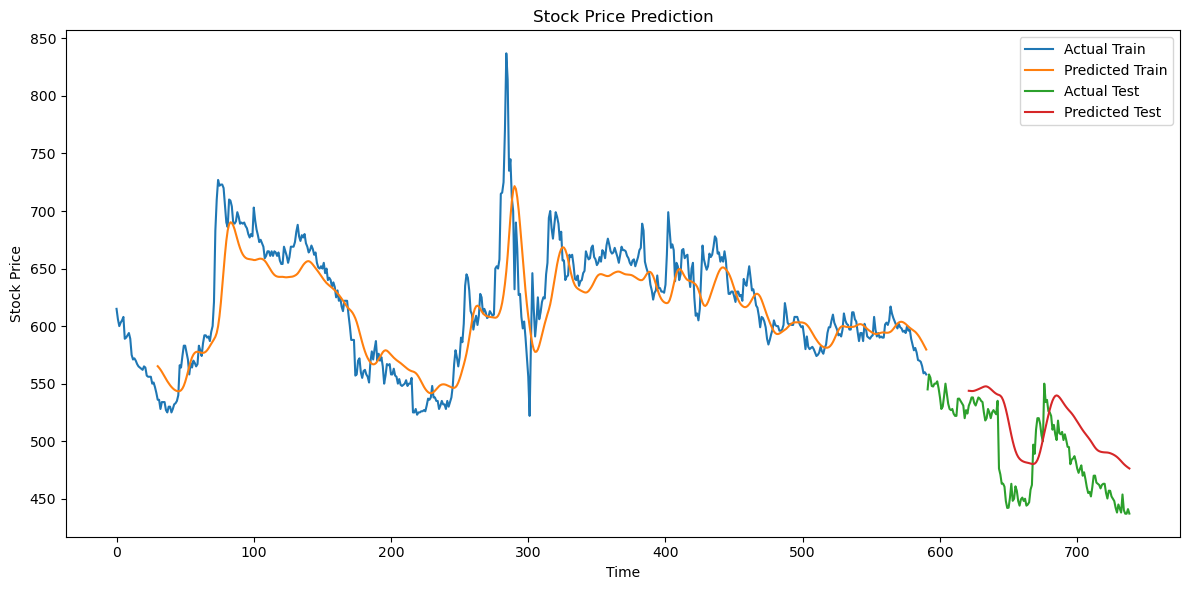

In [ ]:
plt.figure(figsize=(12, 6))
ax = plt.gca()
ax.set_aspect('auto')
plt.plot(df['LTP'][:train_size], label='Actual Train')
plt.plot(range(sequence_length, train_size), train_predictions.flatten(), label='Predicted Train')
plt.plot(range(train_size, len(df)), df['LTP'][train_size:], label='Actual Test')
plt.plot(range(train_size + sequence_length, len(df)), test_predictions.flatten(), label='Predicted Test')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.tight_layout()
plt.show()

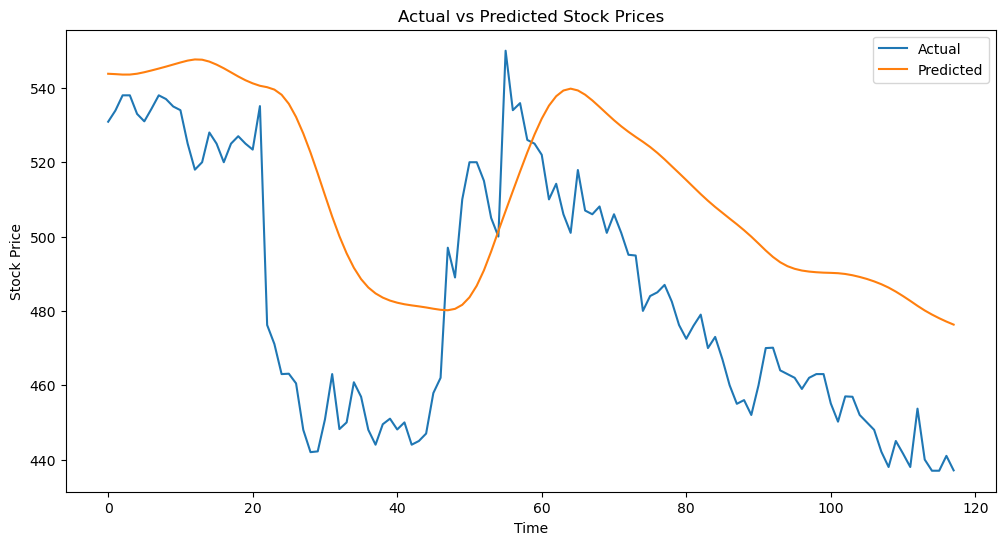

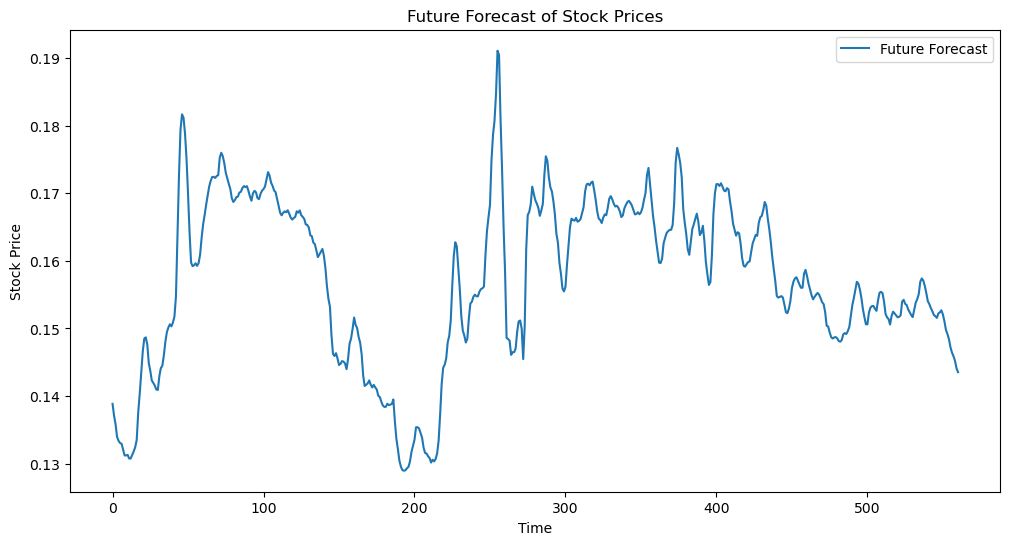

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()

# Plot the future forecast
plt.figure(figsize=(12, 6))
plt.plot(future_data, label='Future Forecast')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Future Forecast of Stock Prices')
plt.legend()
plt.show()